<a href="https://colab.research.google.com/github/mikirosario/python_exercises/blob/master/mod03/ex00/SentimentAnalaysis_Avengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # !pip install colab-xterm
# # %load_ext colabxterm
# %xterm

POS:  47.00%
NEU:  49.00%
NEG:  4.00%


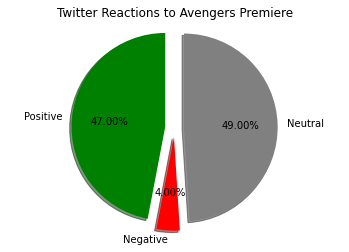

In [57]:
from pysentimiento import create_analyzer
from pysentimiento.preprocessing import preprocess_tweet
import csv
import matplotlib.pyplot as plt

class Analysis:
  positive = 0
  neutral = 0
  negative = 0

def get_text(line: list):
  text = line[1]
  i = text.find(':')
  return text[i+2:]

def show_pie_chart(analysis: Analysis):
  labels= ['Positive', 'Negative', 'Neutral']
  colors=['green', 'red', 'gray']
  sizes= [analysis.positive, analysis.negative, analysis.neutral]
  plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1), autopct='%1.2f%%')
  plt.title('Twitter Reactions to Avengers Premiere')
  plt.axis('equal')
  plt.show()

analyzer = create_analyzer(task="sentiment", lang="en")
analysis = Analysis()

with open('/content/mod03_ex00/tweets.csv', mode='r', encoding='cp1252') as f:
  f.__next__()
  reader = csv.reader(f, delimiter=',')
  textc = 0
  # i = 0
  for line in reader:
    text = preprocess_tweet(get_text(line))
    res = analyzer.predict(text).output
    # # Limit analyzed text strings to this number
    # if i == 100:
    #   break
    # i += 1
    if (res == 'POS'):
      analysis.positive += 1
    elif res == 'NEU':
      analysis.neutral += 1
    else:
      analysis.negative += 1
    textc += 1

  print("POS: ", f"{100 * analysis.positive / textc:.2f}%")
  print("NEU: ", f"{100 * analysis.neutral / textc:.2f}%")
  print("NEG: ", f"{100 * analysis.negative / textc:.2f}%")
  show_pie_chart(analysis)